# TASK 3 -  Stock Price Prediction using LSTM
LGMVIP - DATA SCIENCE - TASK 3

Stock market prediction using LSTM (Long Short-Term Memory) involves using historical stock market data to train an LSTM model that can then be used to make predictions about future stock prices. LSTM models are a type of recurrent neural network (RNN) that can capture temporal dependencies and patterns in sequential data, making them well-suited for time series analysis tasks such as stock market prediction.

# Import necessary packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

# Data Collection

Obtain historical stock market data for the specific stocks or indices you want to predict. This data typically includes features such as date, opening price, closing price, high and low prices, trading volume, etc. We are going to predict for TATAGLOBAL.

In [2]:
dataset_train = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


# Data preprocessing

In [3]:
training_set = dataset_train.iloc[:, 1: 2].values
training_set.shape


#Note the index range in dataset_train.iloc[:, 1: 2].values because we need to make 
#it NumPy array, not a single vector nor a dataframe for training.

(2035, 1)

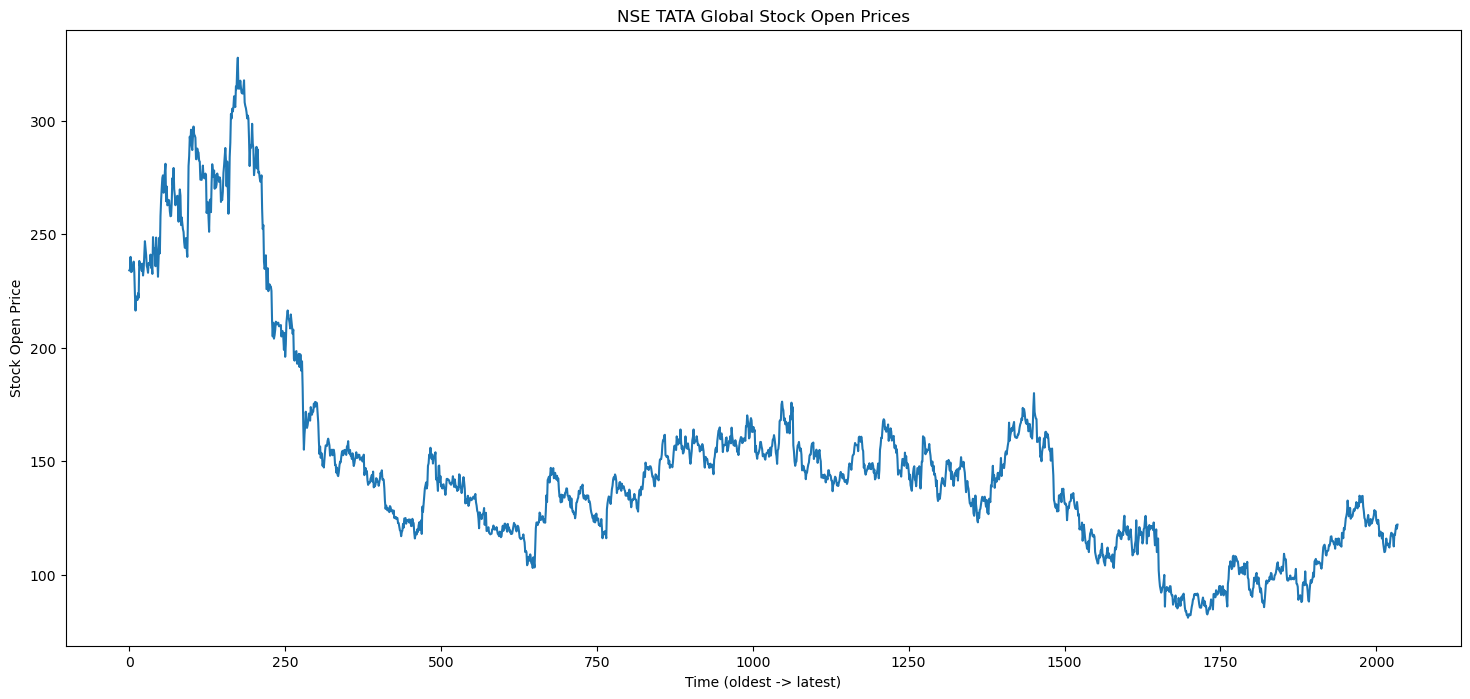

In [4]:
plt.figure(figsize=(18, 8))
plt.plot(dataset_train['Open'])
plt.title("NSE TATA Global Stock Open Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Open Price")
plt.show()

# Feature scaling

This normalization step is crucial for improving the training performance of the LSTM model.

In [5]:
#feature scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Model training

In [6]:
## 60 timesteps and 1 output
#A special data structure is needed to cover 60-time stamps, based on which RNN will predict the 61st price.
#Here the number of past timestamps is set to 60 based on experimentation.

X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60: i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train.shape

(1975, 60)

In [7]:
y_train.shape

(1975,)

In [8]:
#data reshaping

X_train = np.reshape(X_train, newshape = 
                     (X_train.shape[0], X_train.shape[1], 1))

In [9]:
X_train.shape

(1975, 60, 1)

# Model building

Build an LSTM model using a deep learning framework like TensorFlow or Keras. Define the LSTM architecture, including the number of LSTM layers, the number of units in each layer, and any additional layers like Dense or Dropout layers. Experiment with different model configurations to find the optimal architecture.

In [10]:

#Fundamentally, we are building a NN regressor for continuous value prediction using LSTM.


regressor = Sequential()
#add 1st lstm layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(rate = 0.2))

##add 2nd lstm layer: 50 neurons
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

##add 3rd lstm layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

##add 4th lstm layer
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(rate = 0.2))

##add output layer
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

#Now, let’s compile the RNN by choosing an SGD algorithm and a loss function. 
#For optimizer, we use Adam, a safe choice to start with. 
#The loss function is the mean of squared errors between actual values and predictions.

In [ ]:
regressor.fit(x = X_train, y = y_train, batch_size = 32, epochs = 10)


Epoch 1/10


In [22]:
dataset_test = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
dataset_test.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


# Model evaluation

In [ ]:
real_stock_price = dataset_test.iloc[:, 1: 2].values
real_stock_price.shape

In [24]:
#vertical concat use 0, horizontal uses 1
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), 
                          axis = 0)
##use .values to make numpy array
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [25]:
#reshape data to only have 1 col
inputs = inputs.reshape(-1, 1)

#scale input
inputs = sc.transform(inputs)
len(inputs)

2095

In [26]:
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
#add dimension of indicator
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(2035, 60, 1)

# Prediction

In [27]:
predicted_stock_price = regressor.predict(X_test)
#inverse the scaled value
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

64/64 [==============================] - 6s 52ms/step


# visualize the prediction and real price

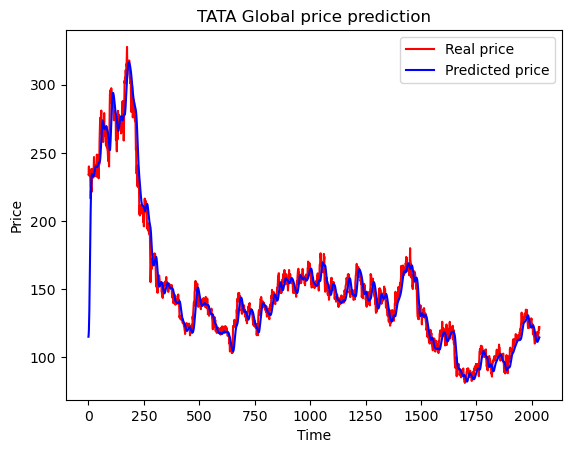

In [29]:

plt.plot(real_stock_price, color = 'red', label = 'Real price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted price')

plt.title('TATA Global price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Note that, based on Brownian Motion, the future variations of stock price are independent of the past. So, it is impossible to predict the exact stock price, but possible to predict and capture the upward and downward trends.


Based on our LSTM technique, our model predicts the trend accurately.